In [71]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import ADF
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import VECM, coint_johansen
from sklearn.preprocessing import StandardScaler

In [72]:
# read into csvs
audgbp = pd.read_csv('/Users/celinezhao/Downloads/wqu_assignment-main/GWP3/Resources/AUDGBP=X.csv', usecols=[0,5]).set_index('Date')
audgbp.columns = ["AUDGBP"]
audjpy = pd.read_csv('/Users/celinezhao/Downloads/wqu_assignment-main/GWP3/Resources/AUDJPY=X.csv', usecols=[0,5]).set_index('Date')
audjpy.columns = ["AUDJPY"]
audusd = pd.read_csv('/Users/celinezhao/Downloads/wqu_assignment-main/GWP3/Resources/AUDUSD=X.csv', usecols=[0,5]).set_index('Date')
audusd.columns = ["AUDUSD"]
gbpusd = pd.read_csv('/Users/celinezhao/Downloads/wqu_assignment-main/GWP3/Resources/GBPUSD=X.csv', usecols=[0,5]).set_index('Date')
gbpusd.columns = ["GBPUSD"]

# merge the datasets
scaled_df = pd.concat([audgbp, audjpy, audusd, gbpusd], axis=1)
scaled_df

,AUDGBP,AUDJPY,AUDUSD,GBPUSD
Date,,,,
2019-04-09,0.54516,79.369003,0.712159,1.306336
2019-04-10,0.54588,79.193001,0.712911,1.305722
2019-04-11,0.54712,79.536003,0.716692,1.309929
2019-04-12,0.54548,79.494003,0.712251,1.305602
2019-04-15,0.54802,80.330002,0.717309,1.308387
...,...,...,...,...
2024-04-03,0.51793,98.709999,0.651440,1.257688
2024-04-04,0.51914,99.556000,0.656900,1.265182
2024-04-05,0.52113,99.661003,0.658770,1.264019


In [73]:
# standardise the data
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(merged_data), columns=merged_data.columns)

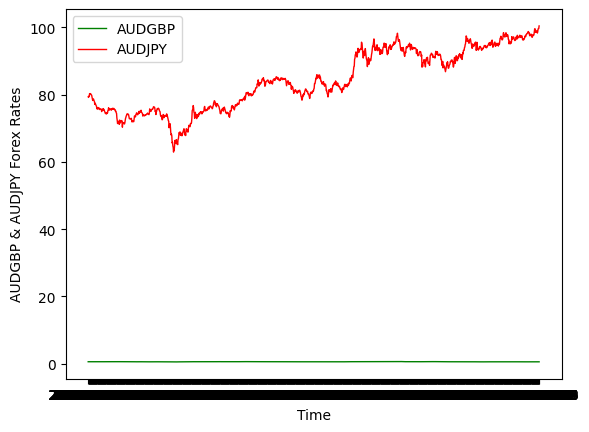

In [74]:
# visualise the data
plt.plot(scaled_df.AUDGBP, linewidth=1, c="g", label="AUDGBP")
plt.plot(scaled_df.AUDJPY, linewidth=1, c="r", label="AUDJPY")
plt.xlabel("Time")
plt.ylabel("AUDGBP & AUDJPY Forex Rates")
plt.legend()
plt.show()

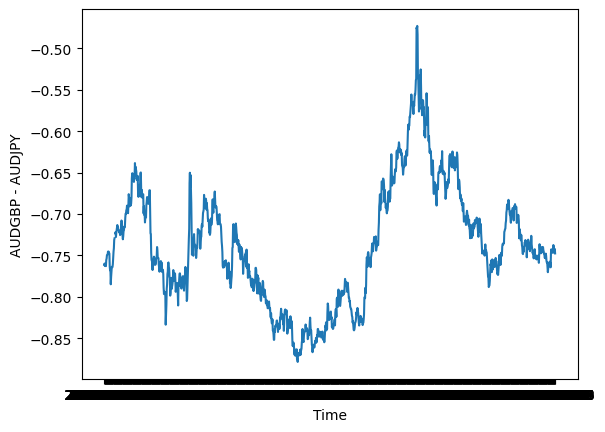

In [75]:
# difference of AUDGBP and AUDJPY
plt.plot(scaled_df.AUDGBP - scaled_df.GBPUSD)
plt.xlabel("Time")
plt.ylabel("AUDGBP - AUDJPY")
plt.show()

EG test

In [76]:
AUDGBP_adf = ADF(scaled_df.AUDGBP, trend="n", method="bic")
print(
    "AUDUSD Augmented Dickey-Fuller Unit Root Test\n", AUDGBP_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", AUDGBP_adf)

AUDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1040
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                       0.747
Time:                        23:11:34   Log-Likelihood:                          5860.4
No. Observations:                1305   AIC:                                 -1.172e+04
Df Residuals:                    1304   BIC:                                 -1.171e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

In [77]:
scaled_df.AUDUSD

Date
2019-04-09    0.712159
2019-04-10    0.712911
2019-04-11    0.716692
2019-04-12    0.712251
2019-04-15    0.717309
                ...   
2024-04-03    0.651440
2024-04-04    0.656900
2024-04-05    0.658770
2024-04-08    0.657022
2024-04-09    0.661848
Name: AUDUSD, Length: 1306, dtype: float64

In [78]:
# ADF Test Results for NZDUSD
AUDJPY_adf = ADF(scaled_df.AUDJPY, trend="n", method="bic")
print(
    "NZDUSD Augmented Dickey-Fuller Unit Root Test\n", AUDJPY_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", AUDJPY_adf)

NZDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.9046
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                       0.342
Time:                        23:11:34   Log-Likelihood:                         -1132.9
No. Observations:                1305   AIC:                                      2268.
Df Residuals:                    1304   BIC:                                      2273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

First differencing

In [79]:
AUDGBP_adf = ADF(scaled_df.AUDGBP.diff().dropna(), trend="n", method="bic")
print(
    "AUDUSD Augmented Dickey-Fuller Unit Root Test\n", AUDGBP_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", AUDGBP_adf)


AUDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.504
Model:                            OLS   Adj. R-squared (uncentered):              0.504
Method:                 Least Squares   F-statistic:                              1326.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                   8.03e-201
Time:                        23:11:34   Log-Likelihood:                          5855.4
No. Observations:                1304   AIC:                                 -1.171e+04
Df Residuals:                    1303   BIC:                                 -1.170e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

In [80]:
AUDJPY_adf = ADF(scaled_df.AUDJPY.diff().dropna(), trend="n", method="bic")
print(
    "NZDUSD Augmented Dickey-Fuller Unit Root Test\n", AUDJPY_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", AUDJPY_adf)

NZDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.498
Method:                 Least Squares   F-statistic:                              1294.
Date:                Tue, 09 Apr 2024   Prob (F-statistic):                   2.14e-197
Time:                        23:11:34   Log-Likelihood:                         -1133.0
No. Observations:                1304   AIC:                                      2268.
Df Residuals:                    1303   BIC:                                      2273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

Conclusion: both datasets contains unit root.

In [84]:
# Two-Step Residual Based Test for Cointegration for AUDUSD and NZDUSD
# (aka Phillips and Ouliaris cointegration test)
from arch.unitroot.cointegration import phillips_ouliaris

print(
    phillips_ouliaris(
        scaled_df.AUDGBP.diff().dropna(), scaled_df.AUDJPY.diff().dropna(), trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -1154.687292798621
P-value: 0.0
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 16.172
Trend: c
Distribution Order: 3


/Users/celinezhao/Downloads/wqu_assignment-main/.venv/lib/python3.9/site-packages/arch/compat/numba.py:46: PerformanceWarning: 
numba is not available, and this function is being executed without JIT
compilation. Either install numba or reinstalling after installing Cython
is strongly recommended.
  warnings.warn(performance_warning, PerformanceWarning)
